<h1 align='center' style="color: blue;">Big Data Analytics - Labeled Faces in the Wild</h1>

<h3 align='center' style="color: black;">Working with data</h3>

In [1]:
from sklearn.datasets import fetch_lfw_people


face_data = fetch_lfw_people(min_faces_per_person=80)

X = face_data.data
Y = face_data.target

In [2]:
print('Input data size :', X.shape)
print('Output data size :', Y.shape)
print('Label names:', face_data.target_names)

Input data size : (1140, 2914)
Output data size : (1140,)
Label names: ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [3]:
Y[:5]

array([2, 3, 1, 4, 1])

In [4]:
for i in range(5):
    print(f'Class {i} has {(Y == i).sum()} samples.')

Class 0 has 236 samples.
Class 1 has 121 samples.
Class 2 has 530 samples.
Class 3 has 109 samples.
Class 4 has 144 samples.


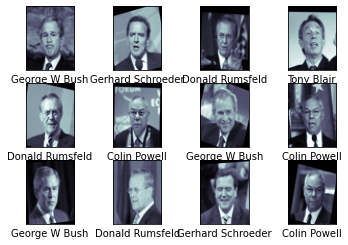

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 4)
for i, axi in enumerate(ax.flat):
    axi.imshow(face_data.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=face_data.target_names[face_data.target[i]])

plt.show()

In [6]:
#Your code goes here
import warnings
warnings.filterwarnings("ignore")

<h3 align='center' style="color: black;">Specifying X (predictor) and y (target) variables</h3>

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

<h3 align='center' style="color: black;">Checking the dtype and shape of X and y</h3>

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((912, 2914), (912,), (228, 2914), (228,))

In [9]:
X_train.dtype

dtype('float32')

In [10]:
set(y_train)

{0, 1, 2, 3, 4}

<h3 align='center' style="color: black;">Training the model</h3>

### 1a. Logistic Regression (orig)

In [128]:
#LOGISTIC REGRESSION MODEL 

# Step 1
from sklearn.linear_model import LogisticRegression

# Step 2
logi_model = LogisticRegression(C=1, max_iter=10000)

# Step 4
logi_model.fit(X_train, y_train)

# Step 5
y_pred = logi_model.predict(X_test)

In [129]:
y_pred

array([4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 1, 2, 3, 4, 2, 2, 4, 4, 2, 0, 4, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 3, 2, 4, 0, 0, 2, 0, 3, 2, 2, 0, 2, 4, 0,
       2, 2, 4, 2, 2, 2, 2, 2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 1, 4, 0, 2,
       1, 2, 0, 2, 3, 4, 2, 1, 2, 2, 2, 1, 2, 4, 2, 2, 2, 3, 2, 4, 4, 2,
       2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 4, 2, 4, 0, 2, 1, 0, 0, 2, 4, 1,
       2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3, 2, 1, 2,
       2, 2, 2, 2, 4, 0, 3, 1, 2, 2, 4, 1, 4, 3, 4, 4, 2, 2, 2, 2, 0, 4,
       0, 0, 1, 3, 2, 0, 2, 0, 4, 2, 0, 3, 0, 2, 2, 0, 2, 1, 4, 2, 2, 2,
       2, 2, 0, 2, 0, 3, 2, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 3, 2,
       2, 0, 2, 2, 4, 3, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 4, 2, 2,
       3, 2, 2, 0, 2, 2, 4, 2])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred, normalize = True) * 100 

87.71929824561403

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print()
print()
print("Classification Report")
print(classification_report(y_test,y_pred))

Confusion Matrix
[[41  1  6  0  1]
 [ 2 15  4  0  0]
 [ 1  3 95  0  1]
 [ 0  0  1 19  4]
 [ 2  0  5  0 27]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        49
           1       0.79      0.71      0.75        21
           2       0.86      0.95      0.90       100
           3       1.00      0.79      0.88        24
           4       0.82      0.79      0.81        34

    accuracy                           0.86       228
   macro avg       0.87      0.82      0.84       228
weighted avg       0.87      0.86      0.86       228



### 1b. Logistic Regression (USING GRIDSEARCHCV)

In [34]:
#LOGISTIC REGRESSION MODEL USING GRIDSEARCHCV

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5) 

grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_*100))

print("Best parameters: ", grid.best_params_)


Best cross-validation score: 84.65
Best parameters:  {'C': 10}


In [35]:
y_pred_grid = grid.predict(X_test)

In [36]:
y_pred_grid

array([4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 1, 2, 3, 4, 2, 2, 4, 4, 2, 0, 4, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 3, 2, 4, 0, 0, 2, 0, 3, 2, 2, 0, 2, 4, 0,
       2, 2, 4, 2, 2, 2, 2, 2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 2, 4, 0, 2,
       1, 2, 0, 2, 3, 4, 2, 1, 2, 2, 2, 1, 2, 4, 2, 2, 2, 3, 2, 4, 4, 1,
       2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 4, 2, 4, 0, 2, 1, 0, 0, 2, 4, 1,
       2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2, 1, 4, 2, 3, 2, 2, 3, 3, 2, 1, 2,
       2, 2, 0, 2, 4, 0, 3, 1, 2, 2, 4, 1, 4, 3, 4, 4, 2, 2, 2, 2, 0, 4,
       0, 0, 1, 3, 2, 0, 2, 0, 4, 2, 0, 3, 0, 2, 2, 0, 2, 1, 4, 2, 2, 2,
       0, 2, 0, 2, 0, 3, 2, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 3, 2,
       2, 0, 2, 2, 4, 3, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 4, 2, 2,
       3, 2, 2, 0, 2, 2, 4, 2])

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_grid, normalize = True) * 100 

86.40350877192982

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_grid))
print()
print()
print("Classification Report")
print(classification_report(y_test,y_pred_grid))

Confusion Matrix
[[41  1  6  0  1]
 [ 2 15  4  0  0]
 [ 1  3 95  0  1]
 [ 0  0  1 19  4]
 [ 2  0  5  0 27]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        49
           1       0.79      0.71      0.75        21
           2       0.86      0.95      0.90       100
           3       1.00      0.79      0.88        24
           4       0.82      0.79      0.81        34

    accuracy                           0.86       228
   macro avg       0.87      0.82      0.84       228
weighted avg       0.87      0.86      0.86       228



### 1c. Logistic Regression (USING RandomSearchCV)

In [52]:
# Logistic Regression with RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': [0.1, 1, 10]}

random_model = RandomizedSearchCV(LogisticRegression(max_iter=10000), param_grid, n_iter=15, cv=10, random_state=101)

random_model.fit(X_train, y_train)

print("Optimal hyperparameter combination:", random_model.best_params_)
print()
print("Mean cross-validated training accuracy score:",random_model.best_score_)

random_model.best_estimator_.fit(X_train, y_train)

y_pred_rand = random_model.best_estimator_.predict(X_test)

Optimal hyperparameter combination: {'C': 10}

Mean cross-validated training accuracy score: 0.8542403248924988


In [53]:
y_pred_rand

array([4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 1, 2, 3, 4, 2, 2, 4, 4, 2, 0, 4, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 3, 2, 4, 0, 0, 2, 0, 3, 2, 2, 0, 2, 4, 0,
       2, 2, 4, 2, 2, 2, 2, 2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 2, 4, 0, 2,
       1, 2, 0, 2, 3, 4, 2, 1, 2, 2, 2, 1, 2, 4, 2, 2, 2, 3, 2, 4, 4, 1,
       2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 4, 2, 4, 0, 2, 1, 0, 0, 2, 4, 1,
       2, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2, 1, 4, 2, 3, 2, 2, 3, 3, 2, 1, 2,
       2, 2, 0, 2, 4, 0, 3, 1, 2, 2, 4, 1, 4, 3, 4, 4, 2, 2, 2, 2, 0, 4,
       0, 0, 1, 3, 2, 0, 2, 0, 4, 2, 0, 3, 0, 2, 2, 0, 2, 1, 4, 2, 2, 2,
       0, 2, 0, 2, 0, 3, 2, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 3, 2,
       2, 0, 2, 2, 4, 3, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 4, 2, 2,
       3, 2, 2, 0, 2, 2, 4, 2])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rand, normalize = True) * 100 

86.40350877192982

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_rand))
print()
print()
print("Classification Report")
print(classification_report(y_test,y_pred_rand))

Confusion Matrix
[[41  1  6  0  1]
 [ 2 15  4  0  0]
 [ 1  3 95  0  1]
 [ 0  0  1 19  4]
 [ 2  0  5  0 27]]


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        49
           1       0.79      0.71      0.75        21
           2       0.86      0.95      0.90       100
           3       1.00      0.79      0.88        24
           4       0.82      0.79      0.81        34

    accuracy                           0.86       228
   macro avg       0.87      0.82      0.84       228
weighted avg       0.87      0.86      0.86       228



### 2a. SVC (orig with kernel='linear')

In [44]:
#SVC

from sklearn.svm import SVC  
svc_model = SVC(kernel='linear') 
svc_model.fit(X_train, y_train)   

y_pred_svc = svc_model.predict(X_test)

In [41]:
y_pred_svc

array([4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 1, 2, 3, 4, 2, 2, 4, 4, 2, 0, 4, 0,
       2, 2, 0, 4, 0, 2, 0, 2, 3, 2, 4, 0, 0, 2, 0, 3, 2, 2, 0, 2, 4, 0,
       2, 2, 4, 2, 2, 2, 2, 2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 1, 1, 0, 2,
       1, 2, 0, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 4, 2, 2, 2, 3, 2, 4, 4, 2,
       2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 4, 2, 4, 0, 2, 0, 0, 0, 2, 4, 1,
       2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2, 4, 3, 2, 3, 2, 2, 3, 2, 2, 1, 2,
       2, 2, 0, 2, 4, 0, 2, 1, 2, 2, 4, 1, 4, 3, 4, 4, 2, 2, 1, 2, 0, 4,
       0, 0, 1, 3, 2, 1, 2, 0, 4, 2, 0, 3, 2, 2, 2, 0, 2, 1, 4, 2, 2, 2,
       0, 2, 0, 2, 0, 3, 2, 2, 0, 3, 2, 0, 2, 0, 2, 0, 2, 2, 0, 3, 3, 2,
       3, 0, 2, 2, 4, 3, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 4, 2, 2,
       3, 2, 2, 0, 2, 2, 4, 2])

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svc, normalize = True) * 100 

82.89473684210526

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_svc))
print()
print()
print("Classification Report")
print(classification_report(y_test,y_pred_svc))

Confusion Matrix
[[39  2  6  0  2]
 [ 4 13  3  0  1]
 [ 2  4 93  0  1]
 [ 0  0  2 19  3]
 [ 1  3  5  0 25]]


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        49
           1       0.59      0.62      0.60        21
           2       0.85      0.93      0.89       100
           3       1.00      0.79      0.88        24
           4       0.78      0.74      0.76        34

    accuracy                           0.83       228
   macro avg       0.81      0.77      0.79       228
weighted avg       0.83      0.83      0.83       228



### 2b. SVC (orig with kernel='rbf')

In [58]:
#SVC

from sklearn.svm import SVC  
svc_model_rbf = SVC(kernel='rbf') 
svc_model_rbf.fit(X_train, y_train)   

y_pred_svc_rbf = svc_model_rbf.predict(X_test)

In [59]:
y_pred_svc_rbf

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 4, 0, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 1, 2,
       2, 2, 2, 2, 4, 0, 2, 1, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2,
       2, 0, 2, 2, 0, 3, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       3, 2, 2, 0, 2, 2, 2, 2])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svc_rbf, normalize = True) * 100 

64.91228070175438

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_svc_rbf))
print()
print()
print("Classification Report")
print(classification_report(y_test,y_pred_svc_rbf))

Confusion Matrix
[[34  0 15  0  0]
 [ 5  6 10  0  0]
 [ 0  0 99  0  1]
 [ 1  0 17  4  2]
 [ 4  0 25  0  5]]


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        49
           1       1.00      0.29      0.44        21
           2       0.60      0.99      0.74       100
           3       1.00      0.17      0.29        24
           4       0.62      0.15      0.24        34

    accuracy                           0.65       228
   macro avg       0.80      0.46      0.49       228
weighted avg       0.72      0.65      0.59       228



### 2c. SVC (with gridsearchcv, kernel='rbf')

In [70]:
# SVC with gridsearchcv, kernel='rbf'

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)


# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.470 total time=   1.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.470 total time=   1.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.473 total time=   1.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.473 total time=   2.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.473 total time=   2.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.470 total time=   1.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.470 total time=   2.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.473 total time=   1.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.473 total time=   1.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.473 total time=   1.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.470 total time=   1.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.470 total time=   1.7s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.473 total time=   1.7s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.473 total time=   1.7s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.473 total time=   1.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.470 total time=   1.8s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.470 total time=   1.7s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.473 total time=   1.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.473 total time=   1.9s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.473 total time=   1.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.678 total time=   1.6s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.678 total time=   1.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.698 total time=   1.8s
[CV 4/5] END ....C=1000, gam

In [71]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)


In [72]:
y_pred_grid = grid.predict(X_test)

In [73]:
y_pred_grid

array([4, 1, 2, 2, 4, 4, 2, 2, 2, 2, 0, 2, 3, 4, 2, 2, 4, 4, 2, 0, 3, 0,
       2, 2, 0, 4, 0, 2, 0, 2, 3, 2, 2, 0, 0, 2, 0, 3, 2, 2, 0, 2, 4, 0,
       2, 2, 4, 2, 2, 2, 2, 2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 1, 1, 1, 2,
       1, 0, 0, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 4, 2, 0, 2, 3, 2, 4, 4, 2,
       2, 1, 2, 2, 0, 0, 2, 0, 2, 4, 0, 4, 2, 4, 0, 2, 0, 0, 0, 2, 4, 1,
       2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2,
       2, 2, 2, 2, 4, 0, 2, 1, 2, 2, 4, 0, 4, 3, 4, 4, 2, 2, 1, 2, 0, 4,
       0, 0, 1, 3, 0, 0, 2, 0, 4, 2, 2, 3, 2, 2, 2, 0, 2, 1, 4, 2, 2, 2,
       2, 2, 0, 2, 0, 3, 2, 2, 0, 3, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 3, 2,
       3, 0, 2, 2, 4, 3, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2,
       3, 2, 2, 0, 2, 2, 1, 2])

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_grid, normalize = True) * 100 

85.52631578947368

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_grid))
print()
print()
print("Classification Report")
print(classification_report(y_test,y_pred_grid))

Confusion Matrix
[[39  1  7  0  2]
 [ 4 14  3  0  0]
 [ 2  0 97  0  1]
 [ 0  0  3 20  1]
 [ 2  4  3  0 25]]


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        49
           1       0.74      0.67      0.70        21
           2       0.86      0.97      0.91       100
           3       1.00      0.83      0.91        24
           4       0.86      0.74      0.79        34

    accuracy                           0.86       228
   macro avg       0.86      0.80      0.83       228
weighted avg       0.86      0.86      0.85       228



### 2d. SVC (with gridsearchcv, kernel='linear')

In [77]:
# SVC with gridsearchcv, kernel='linear'

from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid_linear = GridSearchCV(SVC(), param_grid, refit = True, verbose = 5)
  
# fitting the model for grid search
grid_linear.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.803 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.803 total time=   0.8s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.819 total time=   0.8s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.824 total time=   0.8s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.835 total time=   1.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.803 total time=   1.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.803 total time=   0.9s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.819 total time=   0.9s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.824 total time=   0.9s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.835 total time=   0.9s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.803 total time=   0.9s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.803 total time=   0.8s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.830 total time=   0.9s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.830 total time=   0.9s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.835 total time=   0.9s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.809 total time=   0.9s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.803 total time=   0.9s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.830 total time=   0.9s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.830 total time=   0.9s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.835 total time=   0.9s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.809 total time=   0.8s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.803 total time=   0.8s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.830 total time=   0.8s
[CV 4/5] END .C=1000, gamma=

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=5)

In [78]:
# print best parameter after tuning
print(grid_linear.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_linear.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1, gamma=1, kernel='linear')


In [79]:
y_pred_grid_linear = grid_linear.predict(X_test)

In [80]:
y_pred_grid_linear

array([4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 1, 2, 3, 4, 2, 2, 4, 4, 2, 0, 4, 0,
       2, 2, 0, 4, 0, 2, 0, 2, 3, 2, 4, 0, 0, 2, 0, 3, 2, 2, 0, 2, 4, 0,
       2, 2, 4, 2, 2, 2, 2, 2, 0, 0, 0, 2, 4, 4, 4, 2, 0, 0, 1, 1, 0, 2,
       1, 2, 0, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 4, 2, 2, 2, 3, 2, 4, 4, 2,
       2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 4, 2, 4, 0, 2, 0, 0, 0, 2, 4, 1,
       2, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2, 4, 3, 2, 3, 2, 2, 3, 2, 2, 1, 2,
       2, 2, 0, 2, 4, 0, 2, 1, 2, 2, 4, 1, 4, 3, 4, 4, 2, 2, 1, 2, 0, 4,
       0, 0, 1, 3, 2, 1, 2, 0, 4, 2, 0, 3, 2, 2, 2, 0, 2, 1, 4, 2, 2, 2,
       0, 2, 0, 2, 0, 3, 2, 2, 0, 3, 2, 0, 2, 0, 2, 0, 2, 2, 0, 3, 3, 2,
       3, 0, 2, 2, 4, 3, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1, 4, 2, 2,
       3, 2, 2, 0, 2, 2, 4, 2])

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_grid_linear, normalize = True) * 100 

82.89473684210526

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred_grid_linear))
print()
print()
print("Classification Report")
print(classification_report(y_test,y_pred_grid_linear))

Confusion Matrix
[[39  2  6  0  2]
 [ 4 13  3  0  1]
 [ 2  4 93  0  1]
 [ 0  0  2 19  3]
 [ 1  3  5  0 25]]


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        49
           1       0.59      0.62      0.60        21
           2       0.85      0.93      0.89       100
           3       1.00      0.79      0.88        24
           4       0.78      0.74      0.76        34

    accuracy                           0.83       228
   macro avg       0.81      0.77      0.79       228
weighted avg       0.83      0.83      0.83       228



### 3a. Neural network (with optimizer = 'adam')

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((912, 2914), (912,), (228, 2914), (228,))

In [12]:
import tensorflow as tf
import tensorflow.keras as keras

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [13]:
y_train.shape, y_test.shape

((912, 5), (228, 5))

In [14]:
#Your code goes here

model = keras.models.Sequential([keras.layers.Dense(256, activation='relu', input_shape=[2914]),
                               keras.layers.Dense(128, activation='relu'),
                               keras.layers.Dense(5, activation='softmax')])

2023-03-02 15:11:43.166829: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [95]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               746240    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 779,781
Trainable params: 779,781
Non-trainable params: 0
_________________________________________________________________


In [96]:
#Your code goes here
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [97]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/30
8/8 [==============================] - 1s 36ms/step - loss: 1.8461 - accuracy: 0.3925 - val_loss: 1.5510 - val_accuracy: 0.4386
Epoch 2/30
8/8 [==============================] - 0s 14ms/step - loss: 1.3701 - accuracy: 0.4901 - val_loss: 1.3633 - val_accuracy: 0.4561
Epoch 3/30
8/8 [==============================] - 0s 14ms/step - loss: 1.2725 - accuracy: 0.5219 - val_loss: 1.3130 - val_accuracy: 0.5175
Epoch 4/30
8/8 [==============================] - 0s 16ms/step - loss: 1.1983 - accuracy: 0.5395 - val_loss: 1.3468 - val_accuracy: 0.5044
Epoch 5/30
8/8 [==============================] - 0s 14ms/step - loss: 1.1639 - accuracy: 0.5691 - val_loss: 1.2678 - val_accuracy: 0.5219
Epoch 6/30
8/8 [==============================] - 0s 13ms/step - loss: 1.1155 - accuracy: 0.5888 - val_loss: 1.1634 - val_accuracy: 0.5702
Epoch 7/30
8/8 [==============================] - 0s 14ms/step - loss: 0.9939 - accuracy: 0.6436 - val_loss: 1.4540 - val_accuracy: 0.4605
Epoch 8/30
8/8 [===========

In [100]:
#Let us use history to create a dataframe showing losses and accuracies
import pandas as pd
df = pd.DataFrame(history.history)


In [101]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.846058,0.392544,1.551049,0.438596
1,1.370140,0.490132,1.363290,0.456140
2,1.272496,0.521930,1.312966,0.517544
3,1.198312,0.539474,1.346758,0.504386
4,1.163932,0.569079,1.267756,0.521930


In [102]:
df.tail()

,loss,accuracy,val_loss,val_accuracy
25,0.337335,0.902412,0.665344,0.785088
26,0.302759,0.916667,0.661454,0.754386
27,0.276828,0.923246,0.587626,0.789474
28,0.244215,0.944079,0.560685,0.824561
29,0.243552,0.939693,0.572217,0.798246


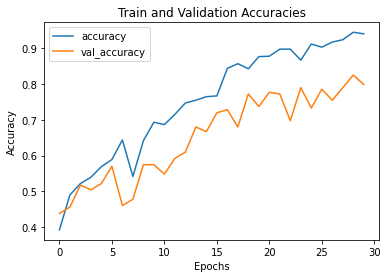

In [103]:
#Let us plot train and validation accuracies
ax = df[['accuracy','val_accuracy']].plot(title = "Train and Validation Accuracies")
ax.set(xlabel ="Epochs", ylabel = "Accuracy")
plt.show()

In [106]:
model.evaluate(X_train, y_train)

29/29 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9529


[0.2250789850950241, 0.952850878238678]

In [105]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.5722 - accuracy: 0.7982


[0.5722171664237976, 0.7982456088066101]

### 3b. Neural network (with optimizer = 'rmsprop')

In [15]:
#Your code goes here

model = keras.models.Sequential([keras.layers.Dense(256, activation='relu', input_shape=[2914]),
                               keras.layers.Dense(128, activation='relu'),
                               keras.layers.Dense(5, activation='softmax')])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               746240    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 779,781
Trainable params: 779,781
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Your code goes here
model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 128, validation_data = (X_test, y_test))

Epoch 1/30
8/8 [==============================] - 1s 30ms/step - loss: 3.6264 - accuracy: 0.2785 - val_loss: 1.9518 - val_accuracy: 0.4386
Epoch 2/30
8/8 [==============================] - 0s 16ms/step - loss: 1.5924 - accuracy: 0.3838 - val_loss: 1.4601 - val_accuracy: 0.4386
Epoch 3/30
8/8 [==============================] - 0s 16ms/step - loss: 1.4428 - accuracy: 0.4759 - val_loss: 1.9091 - val_accuracy: 0.2149
Epoch 4/30
8/8 [==============================] - 0s 17ms/step - loss: 1.4753 - accuracy: 0.4386 - val_loss: 1.4399 - val_accuracy: 0.4386
Epoch 5/30
8/8 [==============================] - 0s 14ms/step - loss: 1.5065 - accuracy: 0.4221 - val_loss: 1.5905 - val_accuracy: 0.4386
Epoch 6/30
8/8 [==============================] - 0s 15ms/step - loss: 1.3731 - accuracy: 0.4704 - val_loss: 1.3132 - val_accuracy: 0.5219
Epoch 7/30
8/8 [==============================] - 0s 12ms/step - loss: 1.3829 - accuracy: 0.4583 - val_loss: 1.7137 - val_accuracy: 0.2325
Epoch 8/30
8/8 [===========

In [19]:
#Let us use history to create a dataframe showing losses and accuracies
import pandas as pd
df = pd.DataFrame(history.history)


In [20]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,3.626397,0.278509,1.951756,0.438596
1,1.592376,0.383772,1.460094,0.438596
2,1.442774,0.475877,1.909098,0.214912
3,1.475265,0.438596,1.439860,0.438596
4,1.506480,0.422149,1.590479,0.438596


In [21]:
df.tail()

,loss,accuracy,val_loss,val_accuracy
25,1.059726,0.578947,1.369503,0.578947
26,0.867600,0.675439,1.484980,0.289474
27,0.764830,0.720395,2.059104,0.311404
28,1.140016,0.537281,1.058053,0.618421
29,0.795307,0.697368,1.984234,0.328947


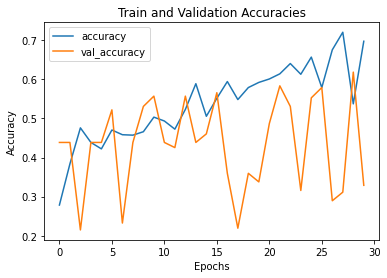

In [22]:
#Let us plot train and validation accuracies
ax = df[['accuracy','val_accuracy']].plot(title = "Train and Validation Accuracies")
ax.set(xlabel ="Epochs", ylabel = "Accuracy")
plt.show()

In [23]:
model.evaluate(X_train, y_train)

29/29 [==============================] - 0s 3ms/step - loss: 1.7543 - accuracy: 0.3816


[1.7543314695358276, 0.3815789520740509]

In [24]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 1.9842 - accuracy: 0.3289


[1.98423433303833, 0.32894736528396606]

In [18]:
details = {
    'Model' : ['Logistic Regression (Orig) %' , 
               'Logistic Regression (GridSearchCV) %', 
               'Logistic Regression (RandomSearchCV) % %',
               'SVC (orig, kernel as linear) %',
               'SVC (orig, kernel as rbf) %',
               'SVC (GridSearchCV, kernel as rbf) %',
               'SVC (GridSearchCV, kernel as linear) %',
               'Neural network %'
              ],
    'Accuracy' : [87.71,86.40,86.40,82.89,64.91,85.52,82.89,94.40],
}
  
# creating a Dataframe object 
df = pd.DataFrame(details)
  
df

,Model,Accuracy
0,Logistic Regression (Orig) %,87.71
1,Logistic Regression (GridSearchCV) %,86.40
2,Logistic Regression (RandomSearchCV) % %,86.40
3,"SVC (orig, kernel as linear) %",82.89
4,"SVC (orig, kernel as rbf) %",64.91
5,"SVC (GridSearchCV, kernel as rbf) %",85.52
6,"SVC (GridSearchCV, kernel as linear) %",82.89
7,Neural network %,94.40


Text(0.5, 1.0, 'Results')

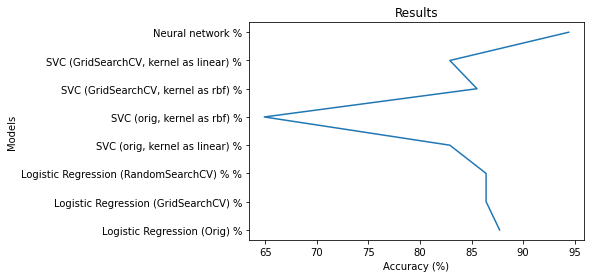

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(details['Accuracy'],details['Model'])
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')
plt.title('Results')

### Comparing the results of all the models, Neural network has performed well with accuracy 94.40%.